# Quantified Self Project
The data I am using in this project is my recorded Bulldog Buck spending in the months of September and October, and the weather in Spokane during those same months. I am trying to determine whether or not the weather coorelated with any of my spending habits these previous two months.

## Loading and Cleaning
Below I will be loading in my csv files into Pandas DataFrames and attempt to clean them up a little. There is not very much to clean, but in the BulldogBuckSpending csv file, I want to fix the values in the "Transaction Date" column to only show the date and make a new column to show the time. I also need to delete the last two rows of the spending csv as well.

In [76]:
import pandas as pd
from decimal import Decimal

weather_df = pd.read_csv("SpokaneWeatherSeptOct.csv")
original_spending_df = pd.read_csv("BulldogBuckSpending.csv")

cleaner_spending_df = original_spending_df.drop(original_spending_df.index[6]) # Deleting the 7th transaction since it wasn't a purchase
cleaner_spending_df = cleaner_spending_df.drop(original_spending_df.index[88:]) # Deleting the last two rows that were NaN
date_and_time_col = cleaner_spending_df["Transaction Date"]
cleaner_spending_df[['Date','Time']] = date_and_time_col.str.split(expand=True) # Splitting the date and the time and readding it
cleaned_spending_df = cleaner_spending_df.drop(columns = "Transaction Date")

cleaned_spending_df.to_csv("CleanedSpending.csv", index = 0) # Wrote the cleaned df to a new csv for easier use later

## Visualizations
Now that I have generally cleaned and organized the csv files how I like, I can now begin comparing the two datasets to see if there are any coorelations between the two.

#### Temperature and Money Spent
First I will compare the amount of money I spent on each day in comparision to what the average weather was like.

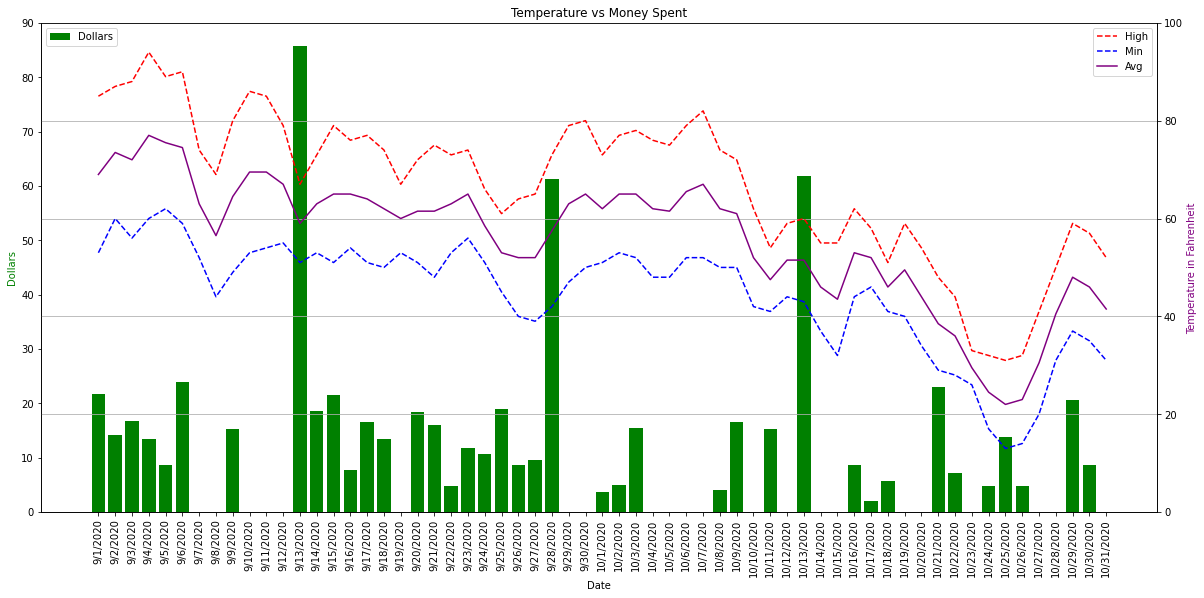

In [157]:
import matplotlib.pyplot as plt

spending_days = cleaned_spending_df.groupby("Date")
spent_per_day = spending_days["Amount"].sum() # Amount of money spent each day

weather_date = weather_df["Date"]
max_temp = weather_df["Max Temp"]
min_temp = weather_df["Min Temp"]
avg_temp = weather_df["Avg Temp"]

organized_spending = spent_per_day[weather_date] # Organized Ser with the spending in chronological order

fig, ax1 = plt.subplots(figsize = (20,9))

ax1.set_xlabel("Date")
ax1.set_ylabel("Dollars", color="green") 
ax1.bar(weather_date, organized_spending, label = "Dollars", color = "green")
ax1.tick_params(axis='y')
plt.legend()
plt.xticks(rotation = 90)
plt.ylim(0,90)

ax2 = ax1.twinx()
ax2.set_ylabel("Temperature in Fahrenheit", color = "purple")
ax2.plot(weather_date,max_temp, label = "High", color = "red", linestyle = "dashed")
ax2.plot(weather_date,min_temp, label = "Min", color = "blue", linestyle = "dashed")
ax2.plot(weather_date,avg_temp, label = "Avg", color = "purple")
ax2.tick_params(axis='y')
plt.ylim(0,100)
plt.grid()
plt.legend()

plt.title("Temperature vs Money Spent")
plt.show()

#### Weather and Spending Frequency
Now I will create a similar graph to see if the temperature had anything to do with the frequency of my Bulldog Buck purchases.

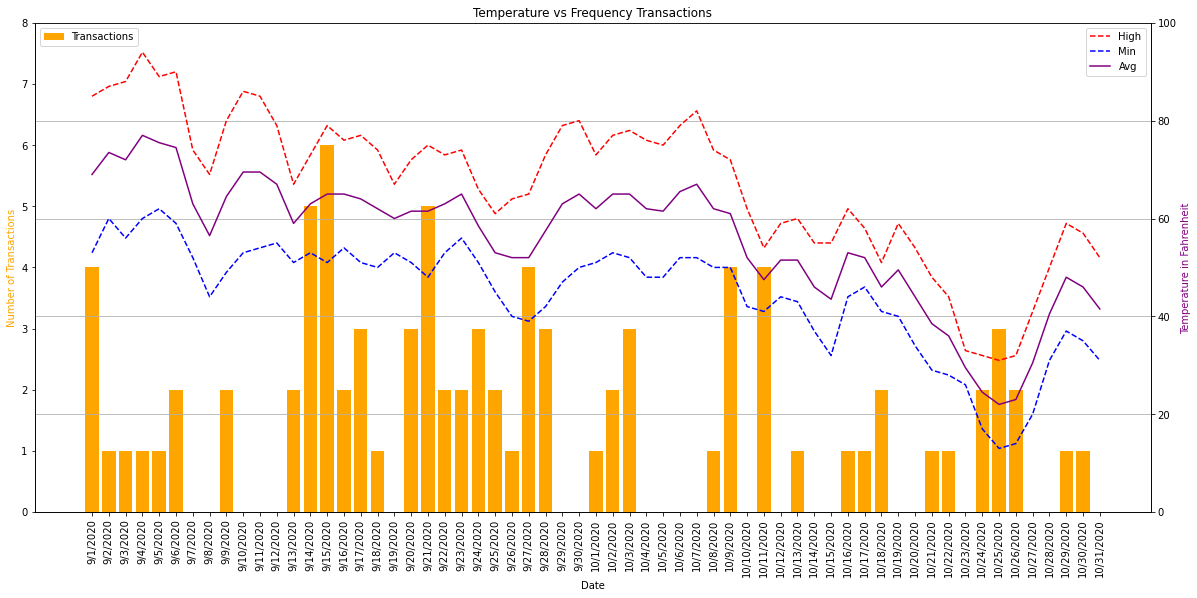

Date
9/1/2020      4.0
9/2/2020      1.0
9/3/2020      1.0
9/4/2020      1.0
9/5/2020      1.0
             ... 
10/27/2020    NaN
10/28/2020    NaN
10/29/2020    1.0
10/30/2020    1.0
10/31/2020    NaN
Name: Date, Length: 61, dtype: float64


In [177]:
import matplotlib.pyplot as plt


transactions_per_day = cleaned_spending_df["Date"].value_counts() #Number of transactions each day

weather_date = weather_df["Date"]
max_temp = weather_df["Max Temp"]
min_temp = weather_df["Min Temp"]
avg_temp = weather_df["Avg Temp"]

organized_transactions = transactions_per_day[weather_date] # Organized Ser with the spending in chronological order

fig, ax1 = plt.subplots(figsize = (20,9))

ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Transactions", color="orange") 
ax1.bar(weather_date, organized_transactions, label = "Transactions", color = "orange")
ax1.tick_params(axis='y')
plt.legend()
plt.xticks(rotation = 90)
plt.ylim(0,8)

ax2 = ax1.twinx()
ax2.set_ylabel("Temperature in Fahrenheit", color = "purple")
ax2.plot(weather_date,max_temp, label = "High", color = "red", linestyle = "dashed")
ax2.plot(weather_date,min_temp, label = "Min", color = "blue", linestyle = "dashed")
ax2.plot(weather_date,avg_temp, label = "Avg", color = "purple")
ax2.tick_params(axis='y')
plt.ylim(0,100)
plt.grid()
plt.legend()

plt.title("Temperature vs Frequency Transactions")
plt.show()
